In [342]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [ ]:
# Question 1 - Top 10 Countries by number of projects
df = pd.read_json('data/world_bank_projects.json')
num_projects = [len(i) for i in df['mjtheme_namecode']] #List comprehension for number of projects per entry in mjtheme
df['Number of Projects'] = num_projects
df_by_countryname = df.groupby(['countryshortname'], as_index=False).sum() # Grouping by country to account for multiple country entries
df_by_countryname_sorted = df_by_countrycode.sort_values(by='Number of Projects', ascending=False).reset_index()
most_projects = [country for country in df_by_countryname_sorted['countryshortname'][0:10]] # List comprehension for top 10 countries

print(df_by_countryname_sorted[['countryshortname', 'Number of Projects']][0:10]) # Top 10, by number of projects

In [240]:
# Question 2 - Top 10 project themes
data = json.load((open('data/world_bank_projects.json')))
df_namecodes = json_normalize(data, 'mjtheme_namecode')

# Dictionary of code-name pairs
code_dict = dict(zip(df_namecodes['code'], df_namecodes['name']))
code_dict['1'] = 'Economic management'
code_dict['6'] = 'Social protection and risk management'

df_namecodes['Name'] = df_namecodes['code'].map(code_dict) #Filling in blank 'name' cells in dataframe

by_namecodes = df_namecodes.groupby('Name')
count_by_name = by_namecodes['Name'].count().reset_index(name="count")
count_by_name_sorted = count_by_name.sort_values(by="count", ascending=False).reset_index()

# Top 10 project themes
print(count_by_name_sorted[['Name', 'count']][0:10]) # Top 10 project themes

                                           Name  count
0  Environment and natural resources management    250
1                             Rural development    216
2                             Human development    210
3                      Public sector governance    199
4         Social protection and risk management    168
5      Financial and private sector development    146
6                   Social dev/gender/inclusion    130
7                         Trade and integration     77
8                             Urban development     50
9                           Economic management     38


In [283]:
# Question 3 - Create dataframe with blanks filled in - Answered as part of Q2.
print(df_namecodes)

     code                                          name  \
0       8                             Human development   
1      11                                                 
2       1                           Economic management   
3       6         Social protection and risk management   
4       5                         Trade and integration   
5       2                      Public sector governance   
6      11  Environment and natural resources management   
7       6         Social protection and risk management   
8       7                   Social dev/gender/inclusion   
9       7                   Social dev/gender/inclusion   
10      5                         Trade and integration   
11      4      Financial and private sector development   
12      6         Social protection and risk management   
13      6                                                 
14      2                      Public sector governance   
15      4      Financial and private sector development 

In [282]:
# OPTIONAL - Data Visualization - Projects Per Country
plt.rcParams['figure.figsize'] = [30, 15]
plt.bar('countryshortname', 'Number of Projects', data=df_by_countryname_sorted)
plt.ylabel('Number of Projects', fontsize=20)
plt.xlabel('Country')
plt.xticks(df_sorted['countryshortname'], fontsize=14, rotation='vertical')
plt.yticks(fontsize=25)
plt.title('Number of Projects Per Country', fontsize=30)
plt.show()

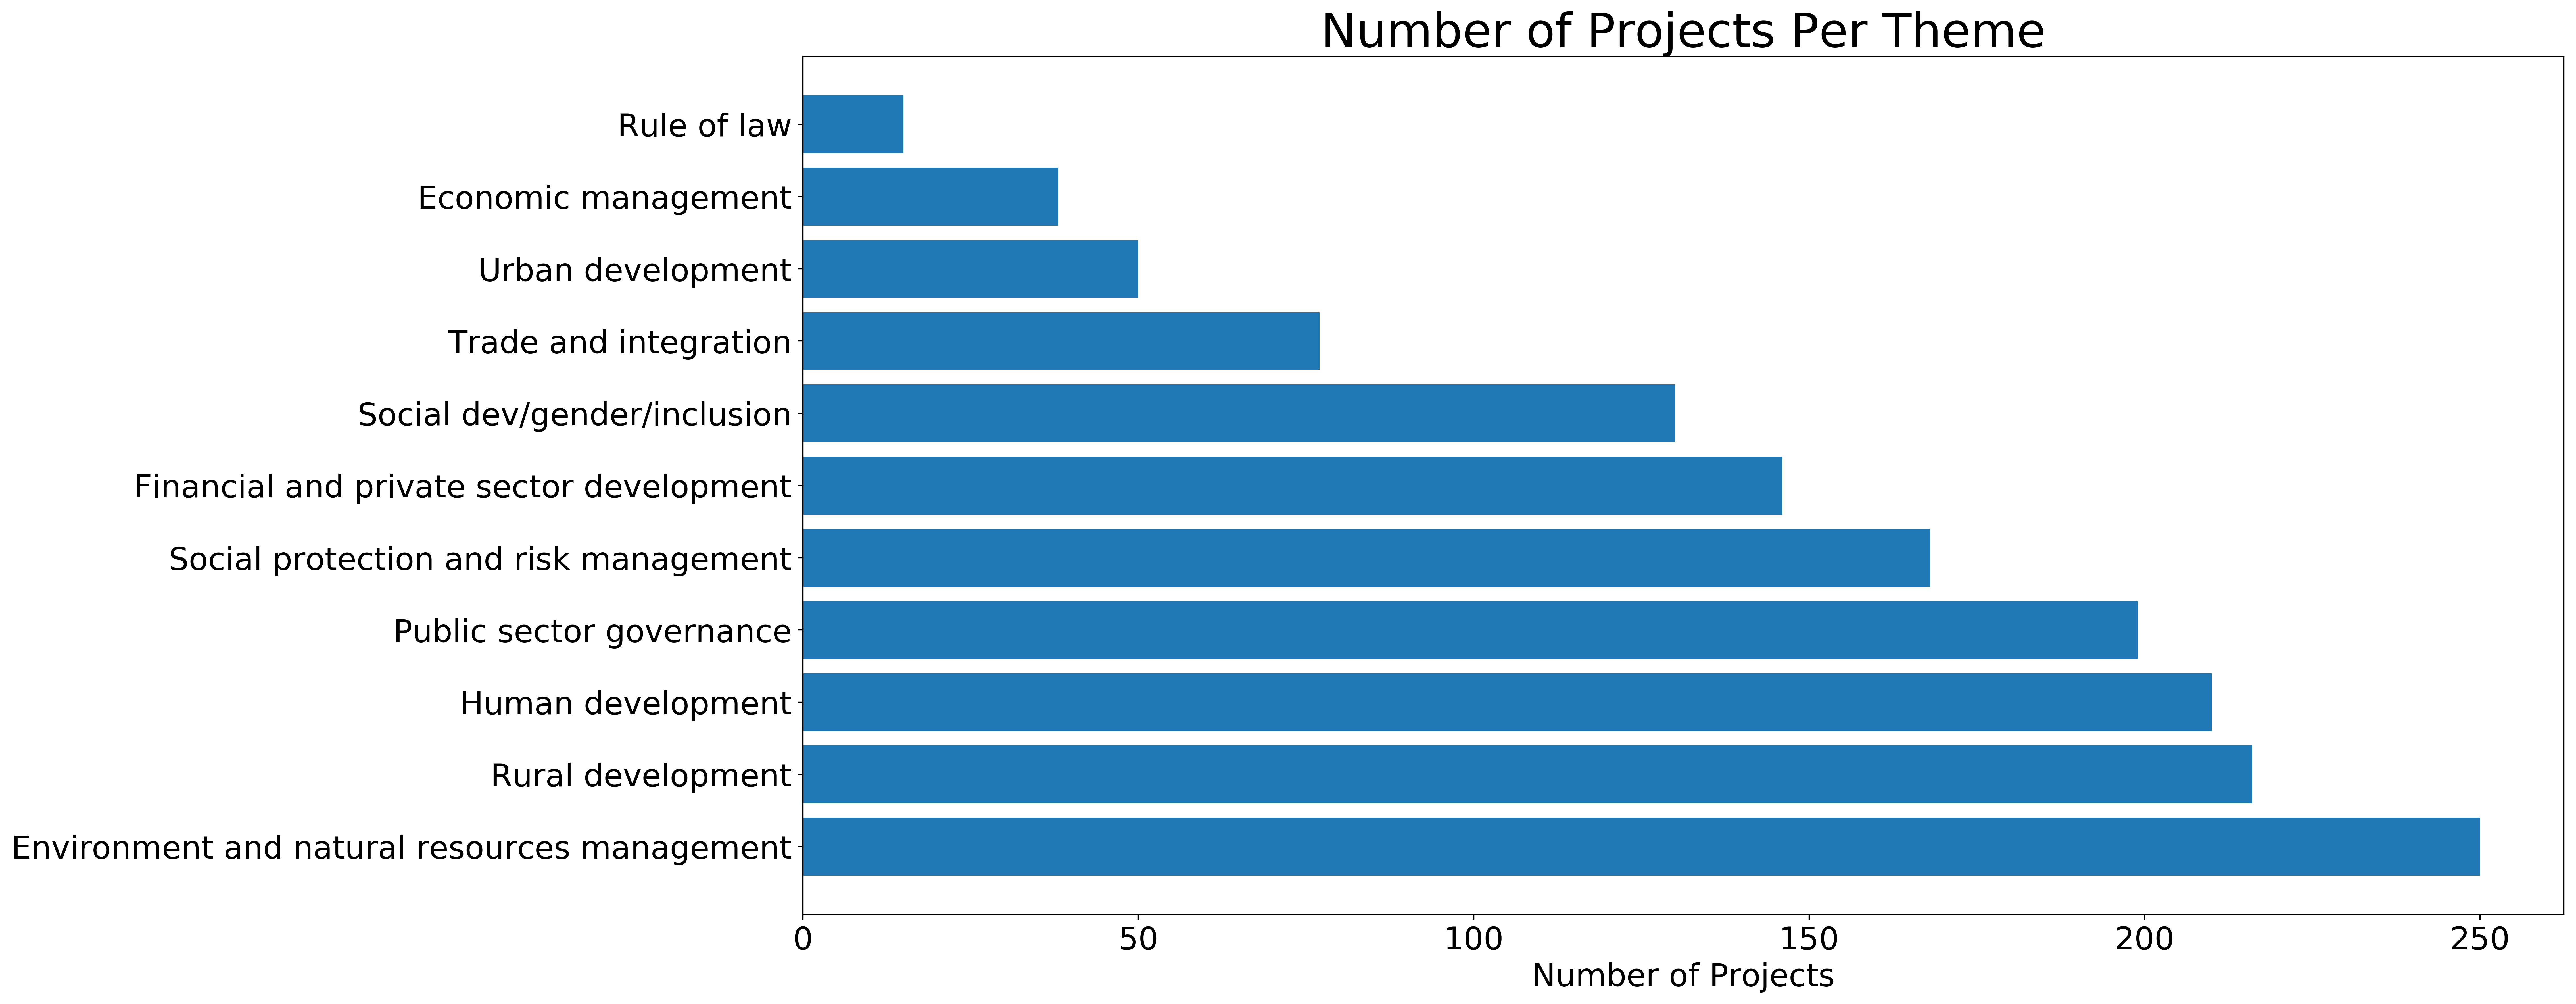

In [235]:
# OPTIONAL - Data Visualization - Barplot - Project Theme Popularity
plt.rcParams['figure.figsize'] = [20,10]
plt.barh('Name', 'count', data=count_by_name_sorted)
plt.title('Number of Projects Per Theme', fontsize=30)
plt.xlabel('Number of Projects', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()